# Titanic dataset: EDA

In this notebook, we're going to analyse the famous Titanic dataset from Kaggle. The dataset is meant for supervised machine learning, but we're only going to do some exploratory analysis at this stage.

We'll try to answer the following questions:

* Who were the passengers on the Titanic? (age, gender, class.. etc)
* What deck were the passengers on and how does that relate to their class?
* Where did the passengers come from?
* Who was alone and who was with family?
* What factors helped someone survive the sinking?

In [50]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [51]:
df = pd.read_csv("data/titanic.csv")

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

`Cabin` column contains many missing values. We need to deal with that when we use `Cabin` column

In [55]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Who were the passengers on the Titanic?

In [56]:
plt.style.use('seaborn')

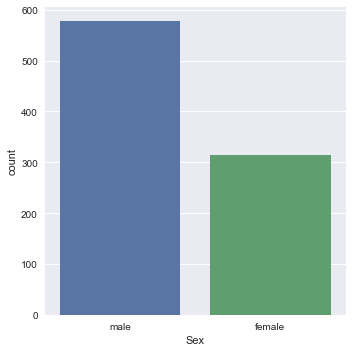

In [57]:
# Factorplot - count of number of male and female passengers
sns.factorplot("Sex", data=df,kind='count');

There are more males on the ship as compared to females

Let's see how the passengers are divided among differet classes.

`Pclass` is the passenger class

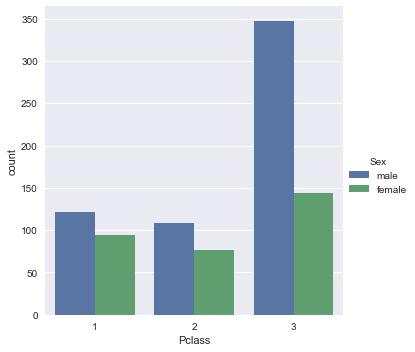

In [58]:
sns.factorplot("Pclass", data=df, hue='Sex', kind="count");

More no of passenger belongs to class 3 and out of it male are in more number

Lets divide passengers to male, female, child

In [59]:
# function to check if passenger is male, female or a child
def check_pax(passenger):
    age=passenger['Age']
    sex=passenger['Sex']
    
    return 'child' if age < 16 else sex

# Creating a new column "Person"
df['Person'] = df.apply(check_pax,axis=1)

In [60]:
df['Person']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Person, Length: 891, dtype: object

In [61]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


<AxesSubplot:>

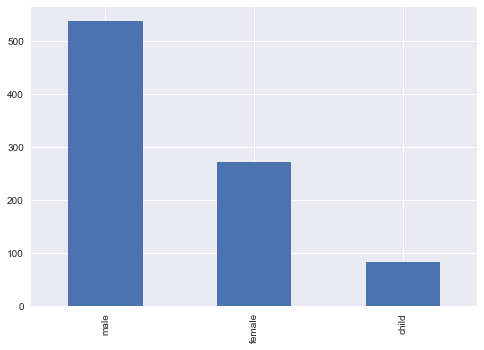

In [62]:
df['Person'].value_counts().plot(kind='bar')

Check the distribution of men, women and children belonging to different classes.

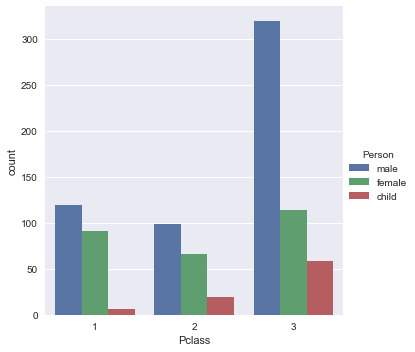

In [63]:
sns.factorplot("Pclass", data=df, hue="Person", kind="count");

There are more male passenger then women or children, in the 3rd class than any other class.

<AxesSubplot:>

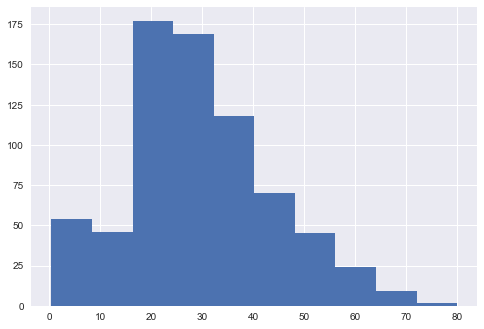

In [64]:
# Age column
df.Age.hist()

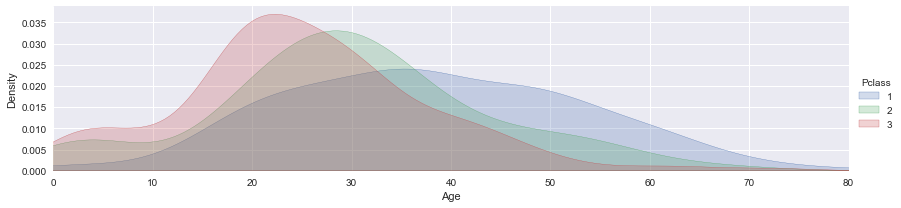

In [65]:
fig = sns.FacetGrid(df,hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = df.Age.max()
fig.set(xlim=(0,oldest))
fig.add_legend();

* Class 1 have more middle aged passenger than children.
* Class 2 and 3 have more children and less older people.

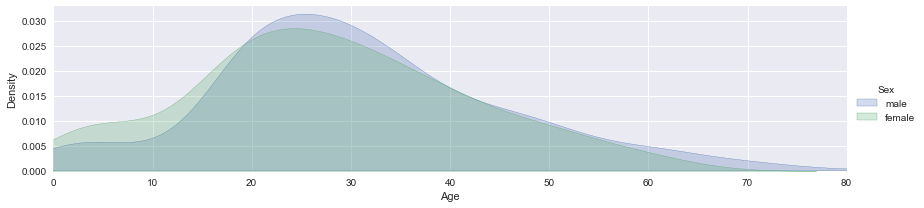

In [66]:
fig = sns.FacetGrid(df,hue="Sex",aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = df.Age.max()
fig.set(xlim=(0,oldest))
fig.add_legend();

Most male and female bolongs to group 20-45 yrs

# What deck were the passengers on and how does that relate to their class?

Let's try and check out if people belonging to higher classes were assigned cabins on a higher deck (or level) of the ship.

In [67]:
# The cabin data was missing in a lot of cases, we can just drop it for now for this section.
deck_df = df.dropna(axis=0)

In [72]:
deck_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female


In [69]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male


The cabin number of a passenger is a combination of the deck they're on, and their room number. So a passenger on deck 'C' will have a cabin number in CXXX format, where XXX can be a room number.

In [70]:
def cabin_no(passenger):
    cabin = passenger['Cabin']
    return cabin[0]

In [74]:
deck_df['Level'] = deck_df.apply(cabin_no, axis=1)

In [75]:
deck_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Level
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,C


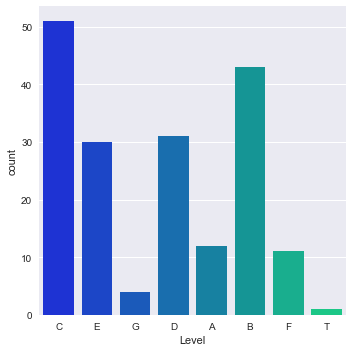

In [77]:
sns.factorplot('Level',data=deck_df,palette='winter',kind='count');

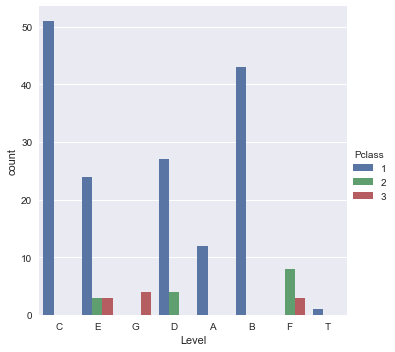

In [78]:
sns.factorplot('Level',data=deck_df, hue='Pclass', kind='count');

* Passengers belonging to high class 1 were assigned higher deck - A,B and C
* Whereas passengers from class 3 were assigned deck - G,E and F

# Where did the passengers come from?

The `Embarked` attribute contains data for the passengers port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).

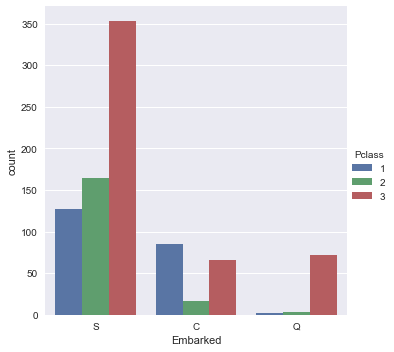

In [80]:
sns.factorplot('Embarked', data=df, hue='Pclass', kind='count');

More people from Southampton were on the ship and most of then were from class 3

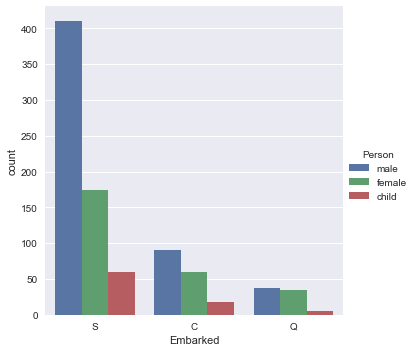

In [84]:
sns.factorplot('Embarked', data=df, hue='Person', kind='count');

As alreday mentioned above, it is clearly visible from the bar chart above most of the passenegers that were from Southampotn were males

# Who was with their family?

The `SibSp` attribute refers to the number of siblings or spouses that a passenger had aboard. `Parch` refers to the number of parents or children someone had on the ship.

In [89]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


In [88]:
# Adding the number of family a passenger had on the ship
df['Alone'] = df.SibSp + df.Parch

In [90]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,male,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,female,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,female,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,male,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,male,0


Alone > 0 means person wasn't alone

In [91]:
df['Alone'].loc[df['Alone']>0] = 'No'
df['Alone'].loc[df['Alone']==0] = 'Yes'

In [92]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Yes


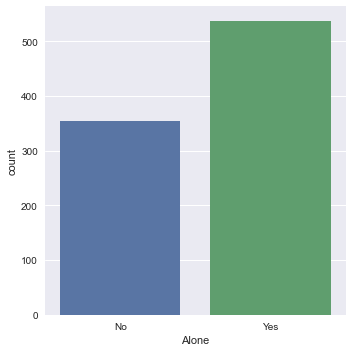

In [94]:
sns.factorplot('Alone',data=df,kind='count');

Majority of the people had family on the ship. Does this improves the chance of survival?

# What factors helped someone survive the sinking?

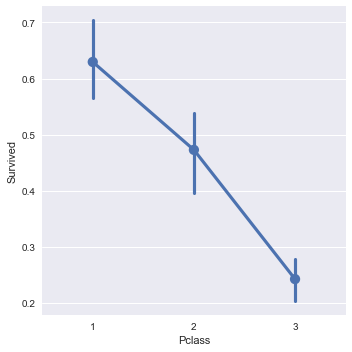

In [95]:
sns.factorplot('Pclass','Survived',data=df);

Passengers belonging to higher had higher chance of surviving as compared to other classes

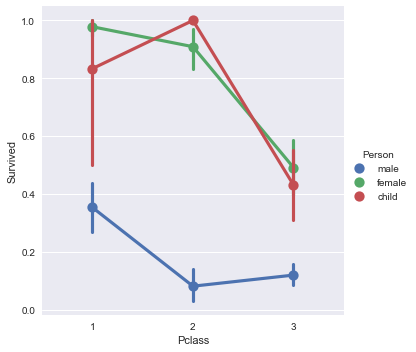

In [96]:
sns.factorplot('Pclass','Survived',data=df,hue='Person');

* Women and Children belonging to class 1 and 2 were the most to be survived as compared to class 3 - Due to Women and Children protocol that was applied during evacuation.
* Men have lower chances of survival as compared to women and children.
* Men, women and children belonging to class 3 had a lesser chance at survival than their counterparts.

Let's check for relationship between the age and survival

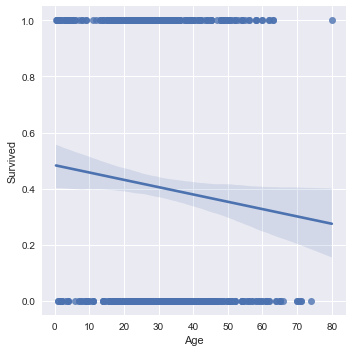

In [97]:
sns.lmplot('Age','Survived',data=df);

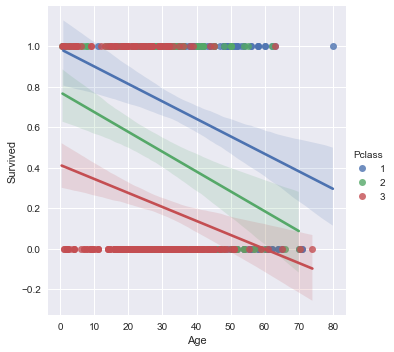

In [99]:
sns.lmplot('Age','Survived',data=df,hue='Pclass');

Passenegers belonging to Class 1 were the most to survive

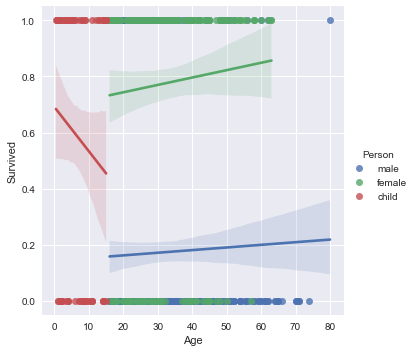

In [105]:
sns.lmplot('Age','Survived',data=df,hue='Person');

* Children - Age 0 to 5 were the most who survived
* Women - Age 50-62 were the most to survived
* Men were the least to survive as compared to others

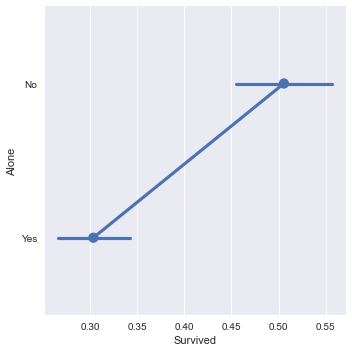

In [107]:
sns.factorplot('Survived','Alone',data=df);

Those who were with family were the most to survive on the ship